<a href="https://colab.research.google.com/github/nightitachi/Block-Notes/blob/main/Titanic11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [ ]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

#Explore Data

In [ ]:
# train.head()
# train.tail()
train.sample()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
164,165,0,3,NaN,4,1,39.6875


In [ ]:
def explore(d):
    print("Columns in the DataFrame:")
    print(d.columns)
    print("\nSummary Statistics:")
    print(d.describe())
    print("\nDataFrame Info:")
    d.info()


In [ ]:
explore(test)

Columns in the DataFrame:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Summary Statistics:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns

In [ ]:
explore(train)

Columns in the DataFrame:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

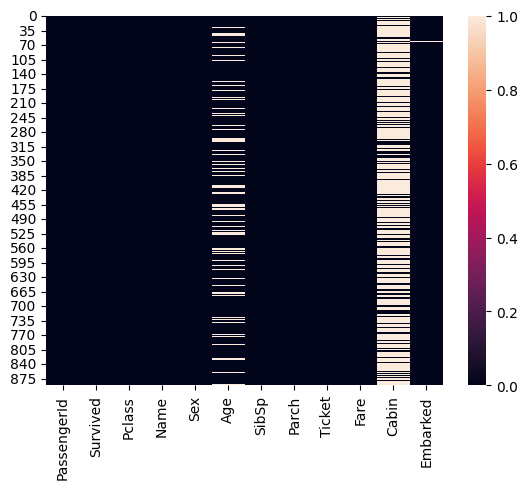

In [ ]:
sns.heatmap(train.isnull())

#Cleaning Data

In [ ]:
def clean(d):
    # Columns to drop
    Not_Necessary_cols = ['Age', 'Cabin', 'Embarked', 'Ticket', 'Name']

    # Drop unnecessary columns if they exist
    for col in Not_Necessary_cols:
        if col in d.columns:
            d.drop(col, axis=1, inplace=True)

    # Fill missing values in 'Age' if the column exists
    if 'Age' in d.columns:
        d['Age'] = d['Age'].fillna(d['Age'].median())

    # Drop rows with remaining missing values
    d.dropna(inplace=True)

    return d


In [ ]:
clean(train)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,1,0,3,male,1,0,7.2500
1,2,1,1,female,1,0,71.2833
2,3,1,3,female,0,0,7.9250
3,4,1,1,female,1,0,53.1000
4,5,0,3,male,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000
887,888,1,1,female,0,0,30.0000
888,889,0,3,female,1,2,23.4500
889,890,1,1,male,0,0,30.0000


In [ ]:
clean(test)

,PassengerId,Pclass,Sex,SibSp,Parch,Fare
0,892,3,male,0,0,7.8292
1,893,3,female,1,0,7.0000
2,894,2,male,0,0,9.6875
3,895,3,male,0,0,8.6625
4,896,3,female,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,male,0,0,8.0500
414,1306,1,female,0,0,108.9000
415,1307,3,male,0,0,7.2500
416,1308,3,male,0,0,8.0500


<Axes: >

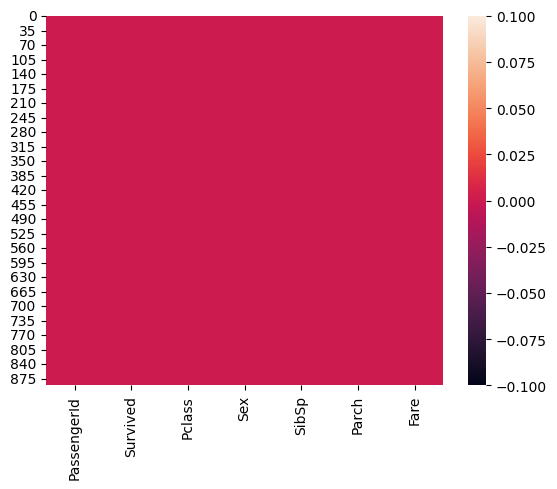

In [ ]:
sns.heatmap(train.isnull())

#Analysing Data

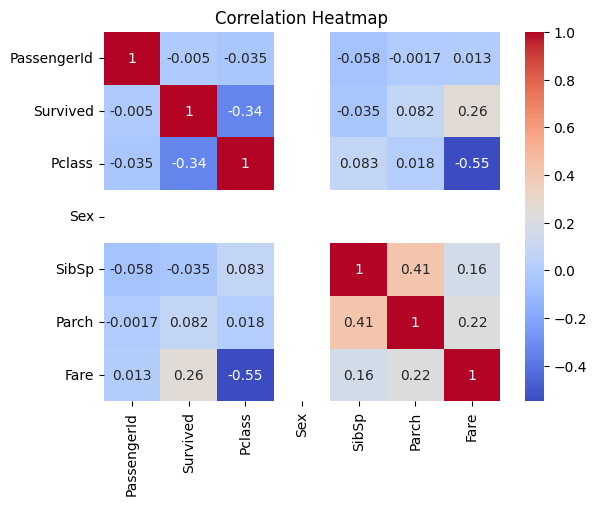

In [ ]:
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
train_encoded = train.select_dtypes(include=['float64', 'int64'])
co = train.corr()
co = train_encoded.corr()
sns.heatmap(co, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
train.corr()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,NaN,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,NaN,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,NaN,0.083081,0.018443,-0.549500
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,-0.057527,-0.035322,0.083081,NaN,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,NaN,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,NaN,0.159651,0.216225,1.000000


In [ ]:
train.Survived.value_counts()

,count
Survived,
0,549
1,342


In [ ]:
# Map 'male' to 0 and 'female' to 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# Check the result
print(train['Sex'].unique())  # Should output: [0, 1]


[nan]


<Axes: ylabel='count'>

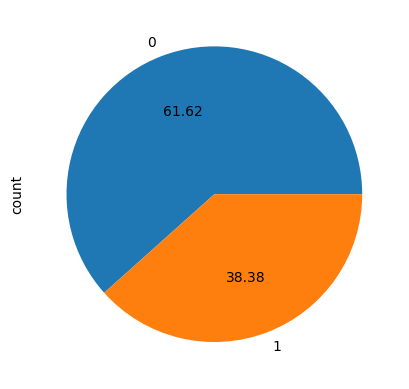

In [ ]:
train.Survived.value_counts().plot.pie(autopct = '%0.2f' ,annot = True)

<Axes: ylabel='count'>

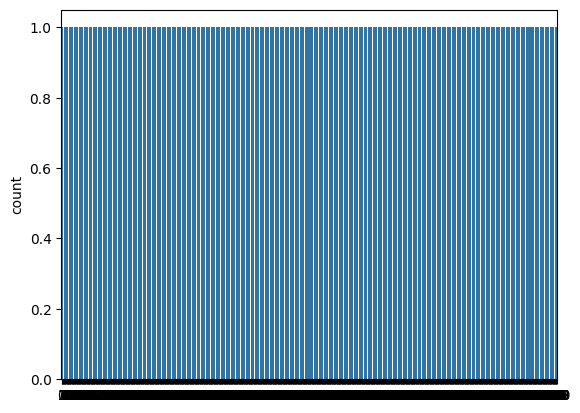

In [ ]:
sns.countplot(train.Pclass)

<Axes: xlabel='Age', ylabel='Count'>

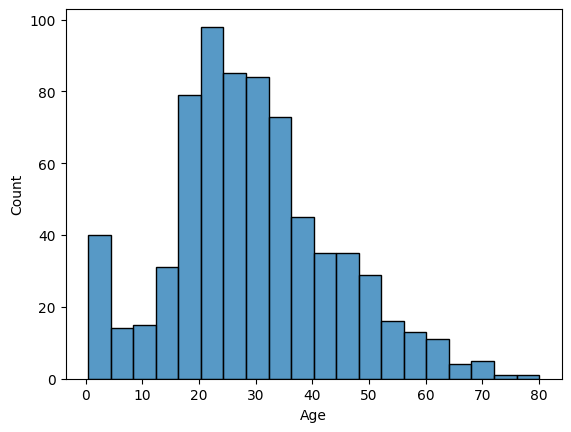

In [ ]:
sns.histplot(train.Age)

<Axes: xlabel='Age', ylabel='count'>

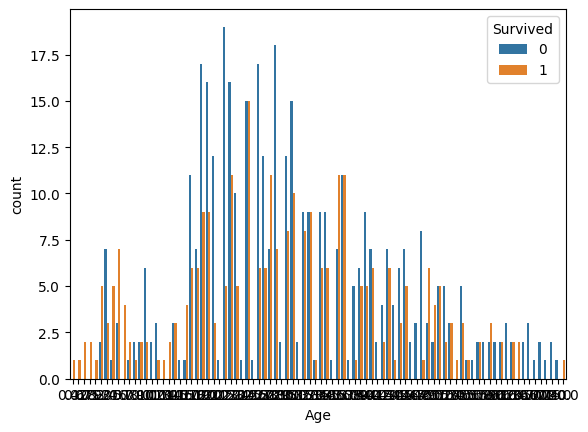

In [ ]:
sns.countplot(x='Age', hue='Survived', data=train)


<Axes: xlabel='Age', ylabel='Count'>

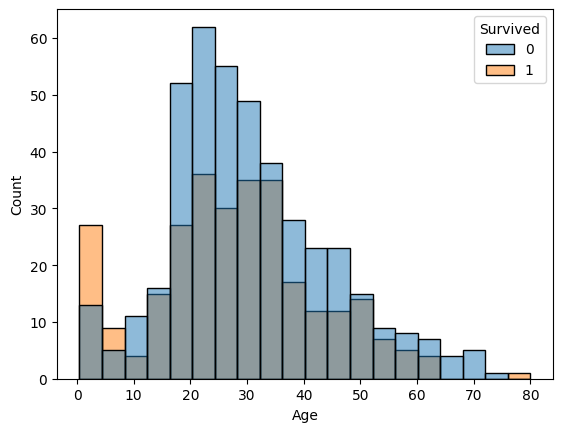

In [ ]:
sns.histplot(x='Age' , hue ='Survived' , data = train)

<Axes: ylabel='count'>

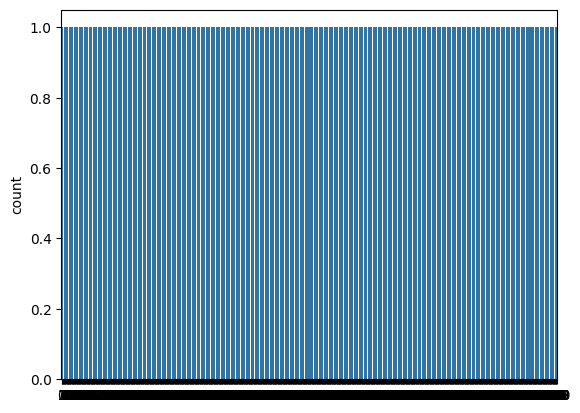

In [ ]:
sns.countplot(train.Pclass)

# Transform Dara

In [ ]:
train = pd.get_dummies(train, columns=['Sex'], drop_first=True)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Sex_male     891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 77.6+ KB


In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Modeling

In [ ]:
x = train.drop('Survived', axis=1)
y = train['Survived']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'train' is your DataFrame
x = train.drop('Survived', axis=1)
y = train['Survived']

# Drop non-numeric columns like 'Name', 'Ticket', 'Cabin' if needed
x = x.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Apply label encoding to 'Sex' column
label_encoder = LabelEncoder()
x['Sex'] = label_encoder.fit_transform(x['Sex'])

# One-Hot Encoding for categorical columns (if needed)
x = pd.get_dummies(x, drop_first=True)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Now fit the model
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)


DecisionTreeClassifier()

In [ ]:
accuracies=[]

In [ ]:
from sklearn.metrics import accuracy_score

pre = model1.predict(x_test)

accuracy = accuracy_score(pre, y_test)

print(accuracy)


0.7541899441340782


In [ ]:
def all(model):
  model.fit(x_train , y_train)
  pre = model.predict(x_test)
  accuracy = accuracy_score(pre, y_test)
  print('accuracy = ', accuracy)
  accuracies.append(accuracy)

In [ ]:
model2 = LogisticRegression()
all(model1)

accuracy =  0.7653631284916201


In [ ]:
model3 = GradientBoostingClassifier()
all(model1)

accuracy =  0.7318435754189944


In [ ]:
algorithms =[ 'LogisticRegression' , 'GradientBoostingClassifier']
results_df = pd.DataFrame({'Algorithms': algorithms, 'Accuracies': accuracies})
print(results_df)

                   Algorithms  Accuracies
0          LogisticRegression    0.765363
1  GradientBoostingClassifier    0.731844


In [ ]:
modelx= GradientBoostingClassifier()
model1.fit(x_train, y_train)
final = test.PassengerId
last_result = pd.DataFrame({'Algorithms': algorithms, 'Accuracies': accuracies})
print(last_result)

                   Algorithms  Accuracies
0          LogisticRegression    0.765363
1  GradientBoostingClassifier    0.731844


In [ ]:
last_result.to_csv('mytest')